## Final Project Submission

Please fill out:
* Student name: Michael Mahoney
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


General notes:
look into movies that are less expensive. This might be a way to limit capital risk if Microsoft doesn't want to go super hard into the investment. 
look at distribution of the top grossing files. Maybe give them a distribution of files to go for, show which ones will have pretty reliable income and which ones are the longshots but have huge payoff potential. 

imports os and glob
use pd.merge

In [1]:
from IPython.display import display, Markdown, Latex
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

In [2]:
dfBomGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
dfimdbName = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

dfimdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
columns = list(dfimdbTitleAkas.columns)
columns[0] = 'tconst'
dfimdbTitleAkas.columns = columns

dfimdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
dfimdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
dfimdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
dfimdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
dfRtMovie = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
dfRtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t', encoding='latin_1')
dfTmbd = pd.read_csv('zippedData/tmdb.movies.csv.gz')
dfTn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#check data frame method keys. Use x.columns
listOfImdbDfs = [dfimdbName,dfimdbTitleAkas,dfimdbTitleBasics,dfimdbTitleCrew,dfimdbTitlePrincipals,dfimdbTitleRatings]
for x in listOfImdbDfs:
    if('tconst' in x.keys()):
        x['tconst'] = x['tconst'].astype('str')

In [3]:
listOfDfs = [dfBomGross, dfimdbName, dfimdbTitleAkas, dfimdbTitleBasics, dfimdbTitleCrew, dfimdbTitlePrincipals, dfimdbTitleRatings, dfRtMovie, dfRtReviews, dfTmbd, dfTn]
for x in listOfDfs:
    display(x.head(1))

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


## Looking at this structure, it's clear that joining tables with only financial information isn't going to give much insight as to why they perform the way they do. For the sake of saving time later, I'm going to combine all of the IMDB info here and use the names of the movies we do have income information on to sort through the IMDB list which is much more complete in terms of information.

In [4]:
dfimdbTitleAkas['tconst'] = dfimdbTitleAkas['tconst'].astype('str')
dfimdbTitleBasics['tconst'] = dfimdbTitleBasics['tconst'].astype('str')
dfimdbTitleCrew['tconst'] = dfimdbTitleCrew['tconst'].astype('str')
dfimdbTitlePrincipals['tconst'] = dfimdbTitlePrincipals['tconst'].astype('str')
dfimdbTitleRatings['tconst'] = dfimdbTitleRatings['tconst'].astype('str')
imdbList = [dfimdbTitleAkas,dfimdbTitleBasics,dfimdbTitleCrew,dfimdbTitlePrincipals,dfimdbTitleRatings]


df = pd.DataFrame()
def joinThings(df1, df2):
    df = df1.merge(df2,how='left',left_on='tconst', right_on='tconst')
    return df


df = joinThings(joinThings(joinThings(joinThings(dfimdbTitleAkas,dfimdbTitleBasics),dfimdbTitleCrew),dfimdbTitlePrincipals),dfimdbTitleRatings)
df.head(1)

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,...,genres,directors,writers,ordering_y,nconst,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,...,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",10.0,nm0189777,producer,producer,NaN,7.0,539338.0


In [5]:
df.isna().sum()/len(df)

tconst               0.000000
ordering_x           0.000000
title                0.000000
region               0.162170
language             0.866354
types                0.453540
attributes           0.952151
is_original_title    0.000009
primary_title        0.000000
original_title       0.000005
start_year           0.000000
runtime_minutes      0.079383
genres               0.008642
directors            0.004945
writers              0.080585
ordering_y           0.000349
nconst               0.000349
category             0.000349
job                  0.744279
characters           0.611412
averagerating        0.147116
numvotes             0.147116
dtype: float64

In [6]:
df.drop(columns = ['language', 'types', 'attributes', 'job', 'characters','category', 'ordering_y', 'ordering_x', 'nconst', 'is_original_title', 'region', 'title', 'original_title'], inplace = True)

In [7]:
df['duplicated'] = df.duplicated()
df = df.drop(df.loc[df['duplicated']].index)

In [8]:
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title')
df2.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN


In [9]:
listOfNames = [x for x in df2.movie.unique()]
def test(x):
    if x in listOfNames:
        return True
    else:
        return False
df['inDf2'] = df['primary_title'].isin(listOfNames)
dfInfo = df.loc[df['inDf2']]

In [10]:

# convert object data to int data for analysis
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title' )

df2['domestic_gross_x'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross_x']]
df2['domestic_gross_x'] = df2['domestic_gross_x'].astype('int64')
df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
df2['production_budget'] =df2['production_budget'].astype('int64')

df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
df2['profit'] = df2['worldwide_gross'] - df2['production_budget']
df2.head(1)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,...,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,duplicated,inDf2,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,...,2011.0,93.0,Horror,nm3786927,"nm2179863,nm4392664",6.1,43.0,False,True,2351345279


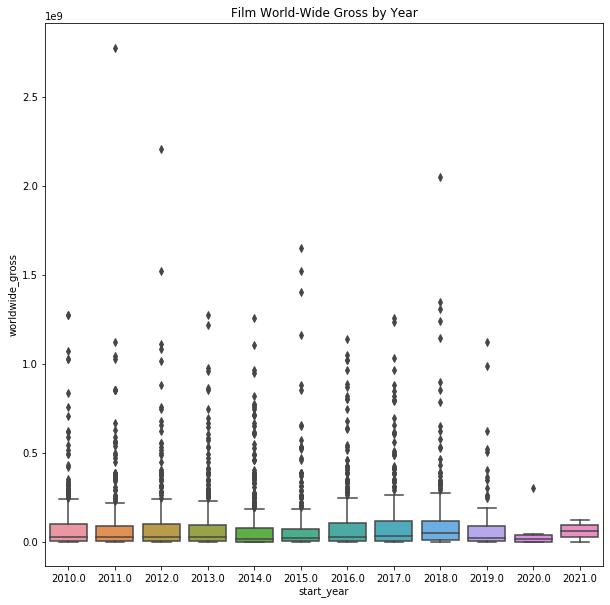

In [11]:
fig,ax = plt.subplots(figsize = (10,10),
                      ncols = 1, nrows = 1)
ax = sns.boxplot(x = df2['start_year'], y = df2['worldwide_gross'])
ax.set_title('Film World-Wide Gross by Year');

In [12]:
#get the names of the directors and writers of the 100 most profitable movies. 

dfimdbName['isTopDirector'] = dfimdbName['nconst'].isin(df2['directors'])
temp = dfimdbName.loc[dfimdbName['isTopDirector']]
df2 = df2.merge(temp, how='left', left_on = 'directors', right_on = 'nconst')


0.6060881813278919

<IPython.core.display.Latex object>

KeyError: 'primary_name'

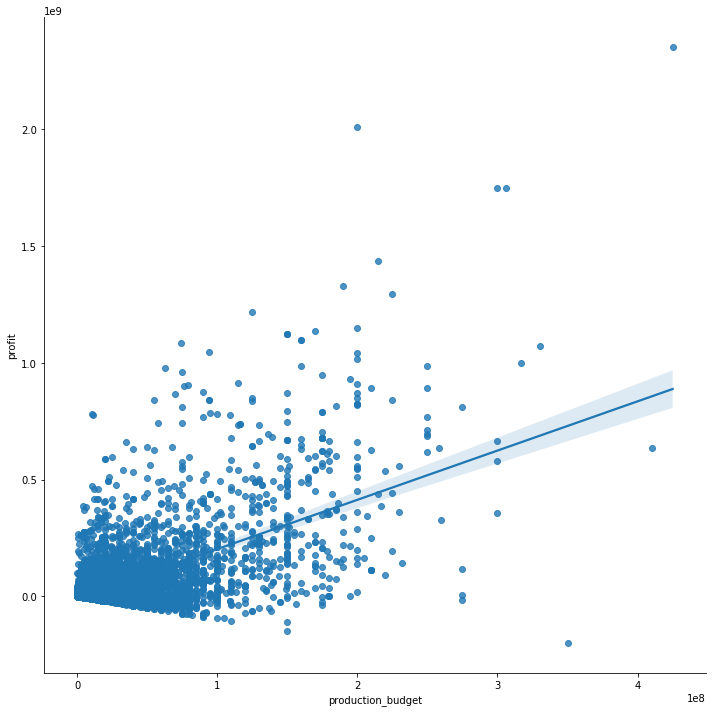

<Figure size 720x720 with 0 Axes>

In [28]:
df2 = df2.sort_values('profit', ascending=False)
display(np.corrcoef(df2['production_budget'], df2['profit'])[0][1])
display(Latex('                                Hello World'))
sns.lmplot(x = 'production_budget', y ='profit', data = df2, height = 10 )
fig = plt.figure(figsize = (10,10));
ax = sns.scatterplot(x = df2.groupby('primary_name').mean().sort_values('profit', ascending=False).index[:50], y =df2.groupby('primary_name').mean().sort_values('profit', ascending=False)['profit'][:50], ax = plt.subplot(2,1,1));
ax.set_xticklabels(df2.groupby('primary_name').mean().sort_values('profit', ascending=False).index[:50], rotation= 60, fontdict={'horizontalalignment':'right'});


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


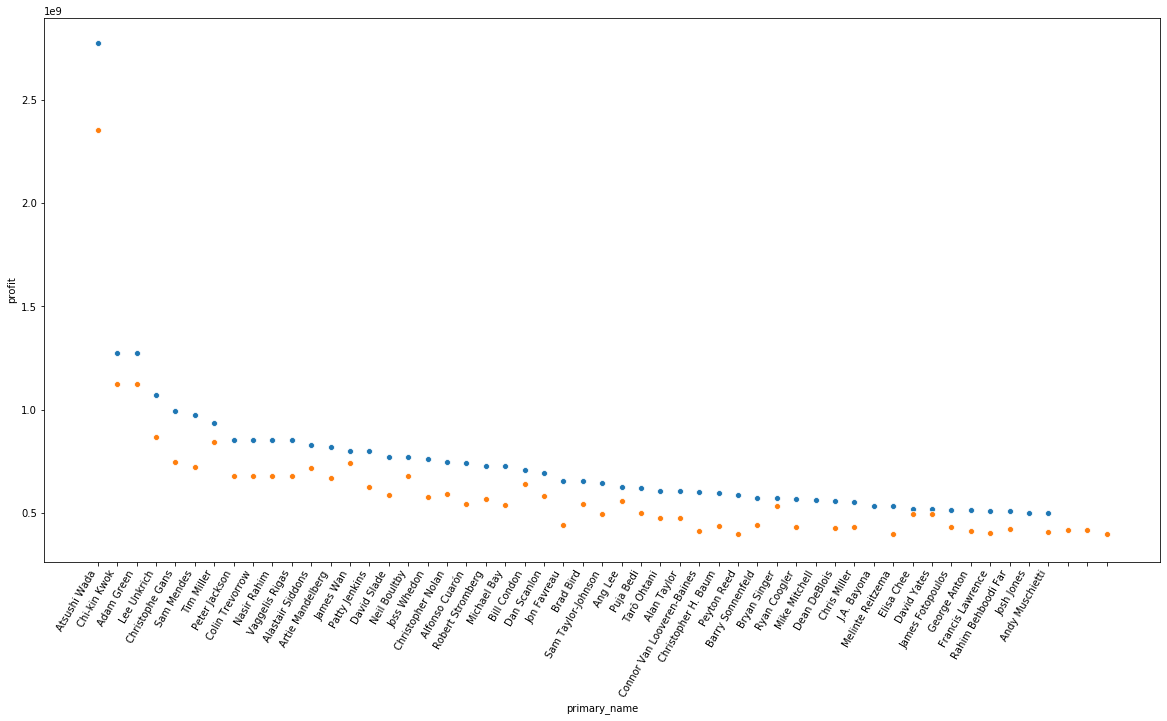

In [14]:
def createAThing(df, categoryArray):
    fig,ax = plt.subplots(figsize = (20,10),
                          ncols = 1, nrows = 1)
    for i in categoryArray:
        x = df.groupby('primary_name').mean().sort_values(i, ascending = False).index[:50]
        y = df.groupby('primary_name').mean().sort_values(i, ascending = False)[i][:50]
        
        ax = sns.scatterplot(x = x, y = y, ax = plt.subplot(1,1,1))
        ax.set_xticklabels(x, rotation= 60, fontdict={'horizontalalignment':'right'});


createAThing(df2, ['worldwide_gross', 'profit'])

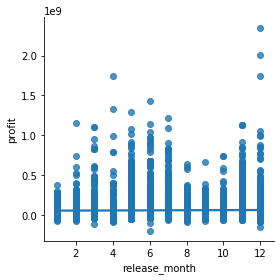

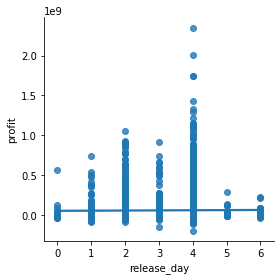

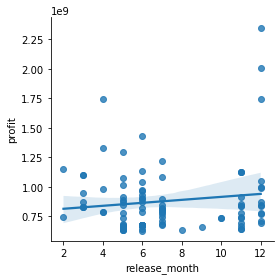

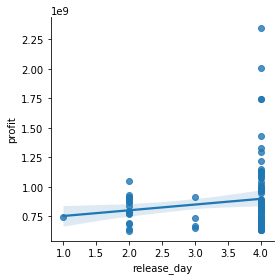

In [15]:
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['release_month'] = pd.DatetimeIndex(df2['release_date']).month
df2['release_day'] = pd.DatetimeIndex(df2['release_date']).weekday
df2 = df2.sort_values('profit', ascending = False)




thing1 = sns.lmplot(x = 'release_month', y ='profit', data = df2, height = 4 )
thing2 = sns.lmplot(x = 'release_day', y ='profit', data = df2, height = 4 )

thing3 = sns.lmplot(x = 'release_month', y ='profit', data = df2[:100], height = 4 )
thing4 = sns.lmplot(x = 'release_day', y ='profit', data = df2[:100], height = 4 )

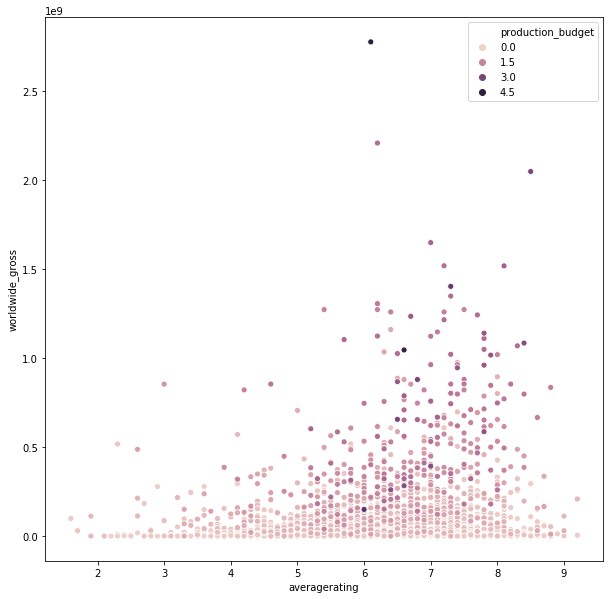

In [16]:
x = df2['averagerating']
y = df2['worldwide_gross']

fig,ax = plt.subplots(figsize = (10,10),
                      ncols = 1, nrows = 1)
ax = sns.scatterplot(x=x, y=y, hue = df2['production_budget'])

In [17]:
def isPrime(num):
    test = [num % x != 0 for x in range(2,num)]
    if all(test):
        return num
primes = []   
for x in range(2, 1000):
    if isPrime(x):
        primes.append(isPrime(x))


In [18]:
# convert object data to int data for analysis
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title' )

df2['domestic_gross_x'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross_x']]
df2['domestic_gross_x'] = df2['domestic_gross_x'].astype('int64')
df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
df2['production_budget'] =df2['production_budget'].astype('int64')

df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
df2['profit'] = df2['worldwide_gross'] - df2['production_budget']

df2['genres'] = df2['genres'].astype('str')

genresList = []
for x in df2['genres']:
    temp = x.lower().strip().split(',')
    for i in temp:
        if i in genresList:
            continue
        else:
            genresList.append(i)
genresDict = {genresList[i]:primes[i] for i in range(len(genresList))}


df2['genres'] = [x.strip().lower().split(',') for x in df2['genres']]

def productFunc(array):
    runningTotal = 1
    for x in array:
        runningTotal = runningTotal*genresDict[x]
    return runningTotal
    
df2['genresCode'] = [productFunc(x) for x in df2['genres']]  

# http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/

df2.isna().sum()/len(df2)

id                   0.000000
release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross_x     0.000000
worldwide_gross      0.000000
title                0.768410
studio               0.768555
domestic_gross_y     0.768699
foreign_gross        0.801268
year                 0.768410
tconst               0.500072
primary_title        0.500072
start_year           0.500072
runtime_minutes      0.544747
genres               0.000000
directors            0.506413
writers              0.546476
averagerating        0.593457
numvotes             0.593457
duplicated           0.500072
inDf2                0.500072
profit               0.000000
genresCode           0.000000
dtype: float64

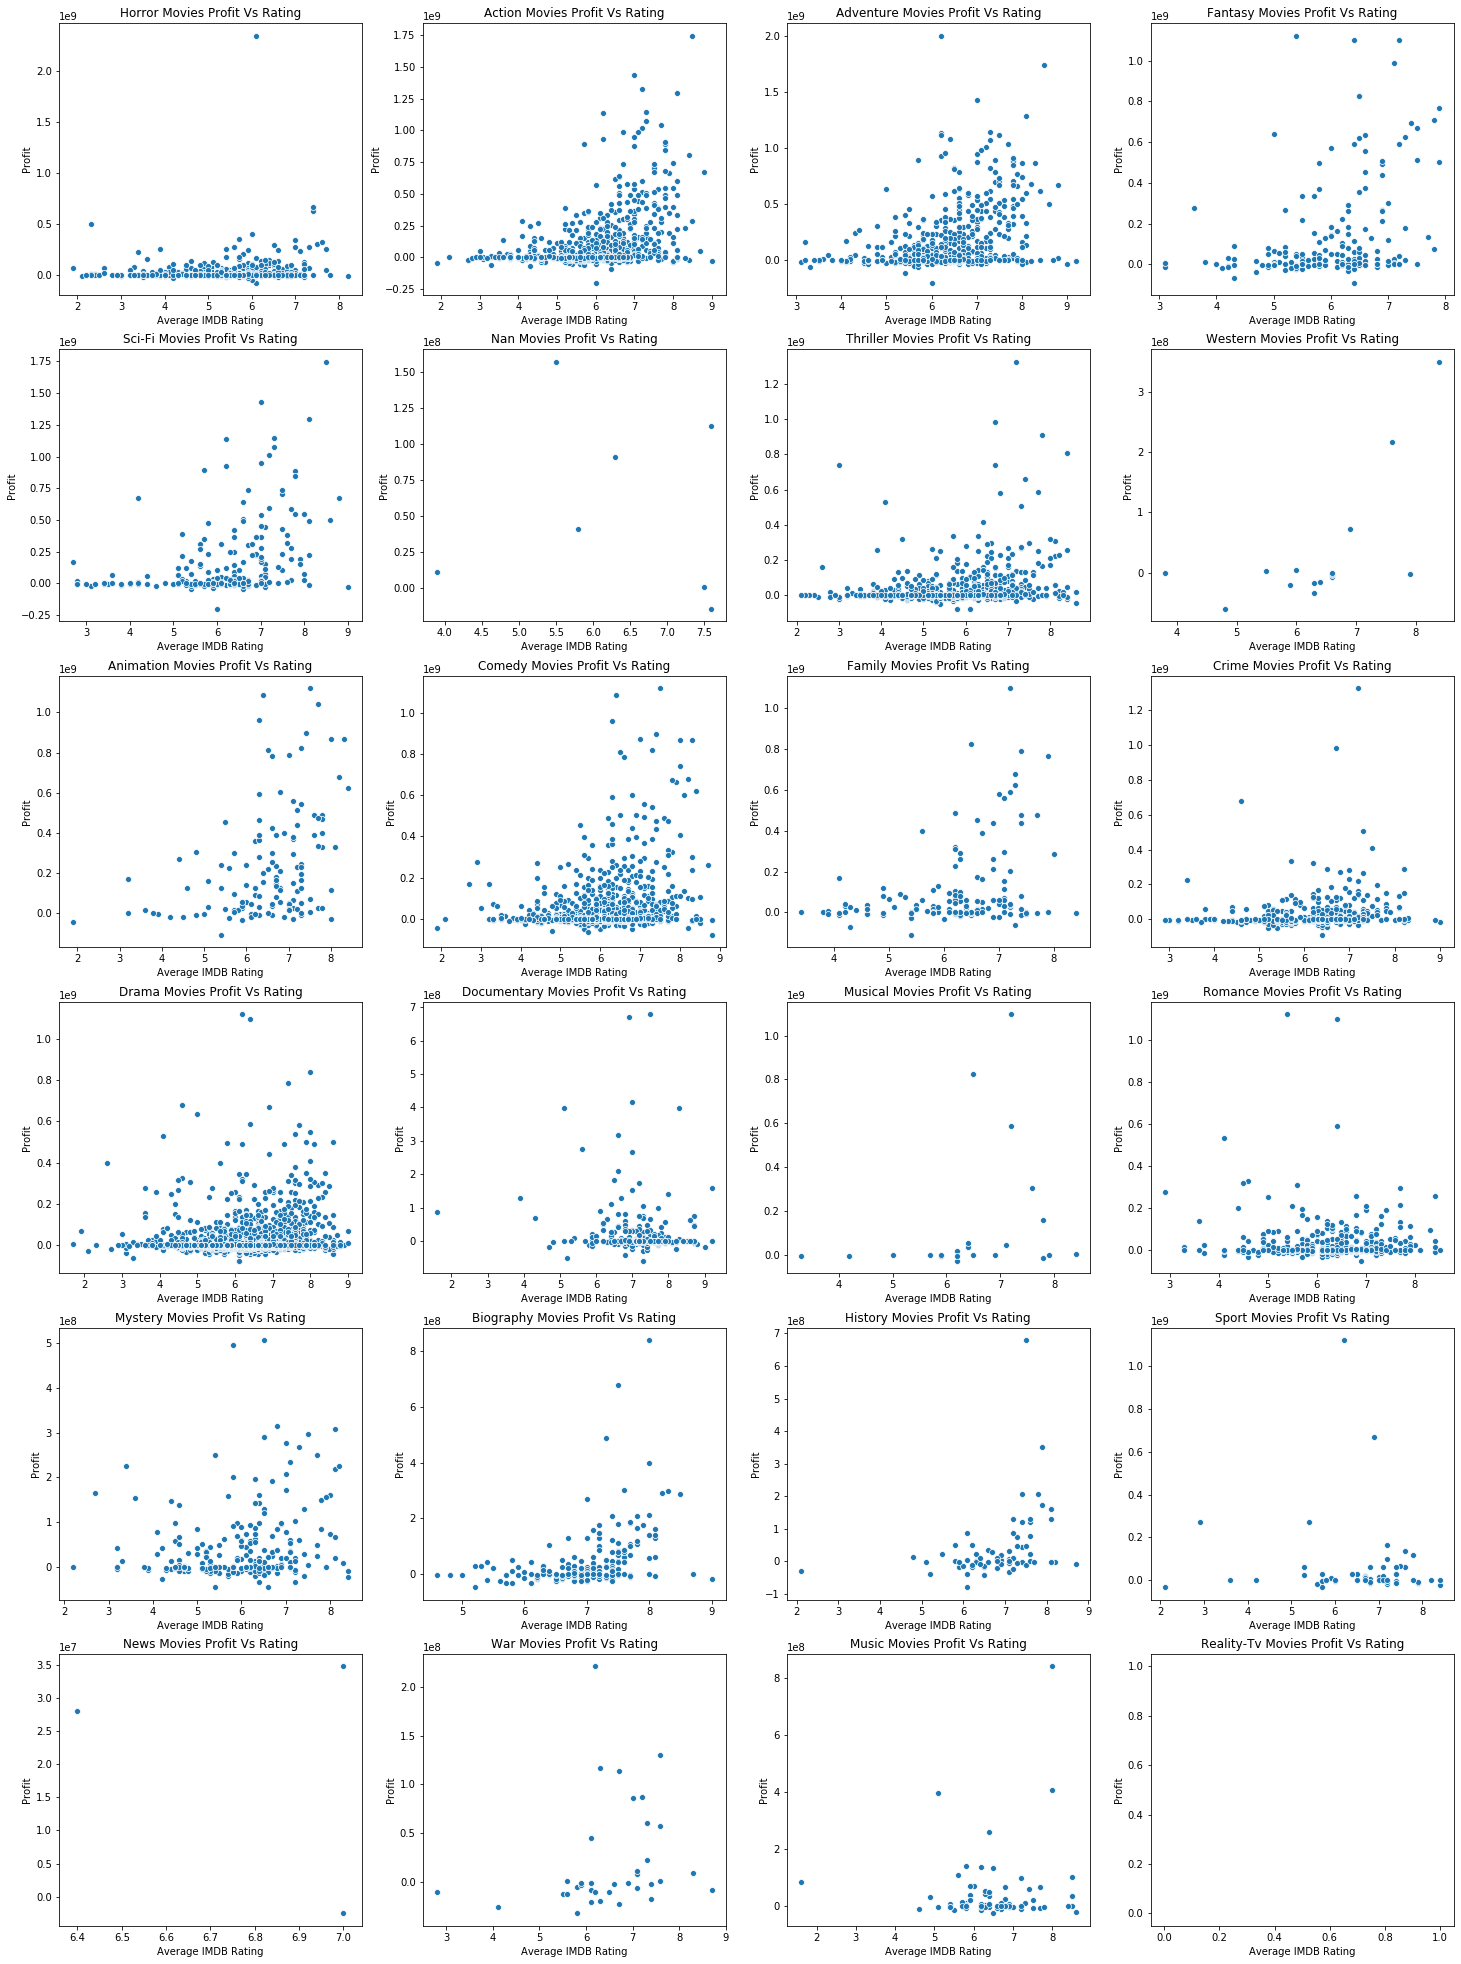

In [19]:
def createAThing(df):
    fig = plt.figure(figsize=(25,35))
    plotnumber = 1
    for i in genresDict.keys():
        df[i] = [(x % genresDict[i] == 0) for x in df['genresCode']];
        x = df.loc[df[i]]['averagerating'];
        y = df.loc[df[i]]['profit'];
        
        ax = sns.scatterplot(x, y, ax = plt.subplot(6,4, plotnumber));
        ax.set_title(f'{i.title()} Movies Profit Vs Rating')
        ax.set_xlabel('Average IMDB Rating')
        ax.set_ylabel('Profit')
        plotnumber = plotnumber +1
    
createAThing(df2);

In [20]:
# # https://seaborn.pydata.org/examples/multiple_joint_kde.html
# df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title' )

# df2['domestic_gross_x'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross_x']]
# df2['domestic_gross_x'] = df2['domestic_gross_x'].astype('int64')
# df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
# df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
# df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
# df2['production_budget'] =df2['production_budget'].astype('int64')

# df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
# df2['profit'] = df2['worldwide_gross'] - df2['production_budget']

# df2['genres'] = df2['genres'].astype('str')
# def kdePlotFunc(df,column,categoryArray):
#     fig = plt.figure(figsize=(15,15))
#     plotnumber = 1
#     for i in categoryArray:
#         df[i] = [i in x.lower() for x in df[column]]
#         x = df.loc[df[i]].groupby('averagerating').mean().sort_values('worldwide_gross', ascending=False).index
#         y = df.loc[df[i]].groupby('averagerating').mean().sort_values('worldwide_gross', ascending=False)['worldwide_gross']
#         ax = sns.kdeplot(x, y,shade=True, shade_lowest=False,legend = True,  ax = plt.subplot(3,3,plotnumber))
#         ax.set_title(i)
#         ax.set_yticks([0,200000000, 400000000, 600000000, 800000000, 1000000000])
#         plotnumber = 1+plotnumber
    
# kdePlotFunc(df2,'genres', ['action', 'adventure','fantasy', 'family', 'sci-fi', 'musical', 'music', 'war']);


